In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Importing a dataset

In [5]:
df = pd.read_csv('auto-mpg.data')
df.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In [6]:
df = pd.read_csv("auto-mpg.data", sep="\t", names=["1", "2"])
df.head()

,1,2
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,ford torino


In [7]:
data = df.iloc[:]["1"]
data

0      18.0   8   307.0      130.0      3504.      12...
1      15.0   8   350.0      165.0      3693.      11...
2      18.0   8   318.0      150.0      3436.      11...
3      16.0   8   304.0      150.0      3433.      12...
4      17.0   8   302.0      140.0      3449.      10...
                             ...                        
393    27.0   4   140.0      86.00      2790.      15...
394    44.0   4   97.00      52.00      2130.      24...
395    32.0   4   135.0      84.00      2295.      11...
396    28.0   4   120.0      79.00      2625.      18...
397    31.0   4   119.0      82.00      2720.      19...
Name: 1, Length: 398, dtype: object

In [8]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin"]


In [9]:
final_data = pd.DataFrame(columns=columns)

for i in data:
    l = [j for j in i.split()]
    final_data = final_data.append(pd.Series(l, index=columns), ignore_index=True)
final_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1


In [10]:
final_data.info

<bound method DataFrame.info of       mpg cylinders displacement horsepower weight acceleration model year  \
0    18.0         8        307.0      130.0  3504.         12.0         70   
1    15.0         8        350.0      165.0  3693.         11.5         70   
2    18.0         8        318.0      150.0  3436.         11.0         70   
3    16.0         8        304.0      150.0  3433.         12.0         70   
4    17.0         8        302.0      140.0  3449.         10.5         70   
..    ...       ...          ...        ...    ...          ...        ...   
393  27.0         4        140.0      86.00  2790.         15.6         82   
394  44.0         4        97.00      52.00  2130.         24.6         82   
395  32.0         4        135.0      84.00  2295.         11.6         82   
396  28.0         4        120.0      79.00  2625.         18.6         82   
397  31.0         4        119.0      82.00  2720.         19.4         82   

    origin  
0        1  
1    

## Data Cleaning

In [12]:
for i in final_data.columns:
    print(i)
    print(final_data[i].unique())

mpg
['18.0' '15.0' '16.0' '17.0' '14.0' '24.0' '22.0' '21.0' '27.0' '26.0'
 '25.0' '10.0' '11.0' '9.0' '28.0' '19.0' '12.0' '13.0' '23.0' '30.0'
 '31.0' '35.0' '20.0' '29.0' '32.0' '33.0' '17.5' '15.5' '14.5' '22.5'
 '24.5' '18.5' '29.5' '26.5' '16.5' '31.5' '36.0' '25.5' '33.5' '20.5'
 '30.5' '21.5' '43.1' '36.1' '32.8' '39.4' '19.9' '19.4' '20.2' '19.2'
 '25.1' '20.6' '20.8' '18.6' '18.1' '17.7' '27.5' '27.2' '30.9' '21.1'
 '23.2' '23.8' '23.9' '20.3' '21.6' '16.2' '19.8' '22.3' '17.6' '18.2'
 '16.9' '31.9' '34.1' '35.7' '27.4' '25.4' '34.2' '34.5' '31.8' '37.3'
 '28.4' '28.8' '26.8' '41.5' '38.1' '32.1' '37.2' '26.4' '24.3' '19.1'
 '34.3' '29.8' '31.3' '37.0' '32.2' '46.6' '27.9' '40.8' '44.3' '43.4'
 '36.4' '44.6' '40.9' '33.8' '32.7' '23.7' '23.6' '32.4' '26.6' '25.8'
 '23.5' '39.1' '39.0' '35.1' '32.3' '37.7' '34.7' '34.4' '29.9' '33.7'
 '32.9' '31.6' '28.1' '30.7' '24.2' '22.4' '34.0' '38.0' '44.0']
cylinders
['8' '4' '6' '3' '5']
displacement
['307.0' '350.0' '318.0' '304.0' '3

In [13]:
final_data = final_data.replace('?', np.NaN)

In [14]:
final_data = final_data.astype('float64')
final_data.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0        4.0         140.0        86.0  2790.0          15.6   
394  44.0        4.0          97.0        52.0  2130.0          24.6   
395  32.0        4.0         135.0        84.0  2295.0          11.6   
396  28.0        4.0         120.0        79.0  2625.0          18.6   
397  31.0        4.0         119.0        82.0  2720.0          19.4   

     model year  origin  
0          70.0     1.0  
1          70.0     1.0  
2          70.0     1.0  

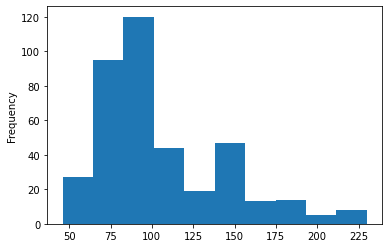

In [16]:
final_data.horsepower.plot(kind="hist")

In [18]:
final_data.horsepower.skew()


1.0873262824048695

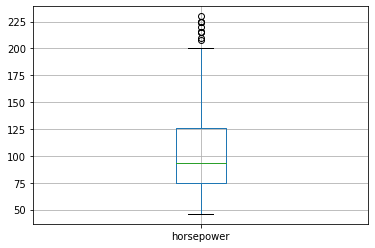

In [19]:
final_data.boxplot("horsepower")

In [22]:
final_data.horsepower = final_data.horsepower.fillna(final_data.horsepower.median())
final_data.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0        4.0         140.0        86.0  2790.0          15.6   
394  44.0        4.0          97.0        52.0  2130.0          24.6   
395  32.0        4.0         135.0        84.0  2295.0          11.6   
396  28.0        4.0         120.0        79.0  2625.0          18.6   
397  31.0        4.0         119.0        82.0  2720.0          19.4   

     model year  origin  
0          70.0     1.0  
1          70.0     1.0  
2          70.0     1.0  

In [23]:
final_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


## Exploratory Data Analysis

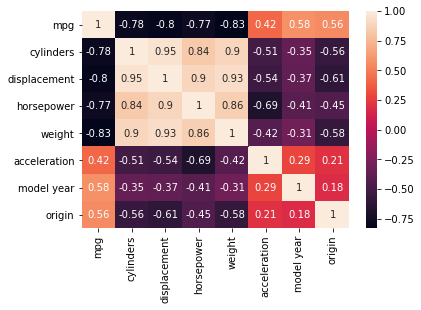

In [25]:
sns.heatmap(final_data.corr(), annot = True)

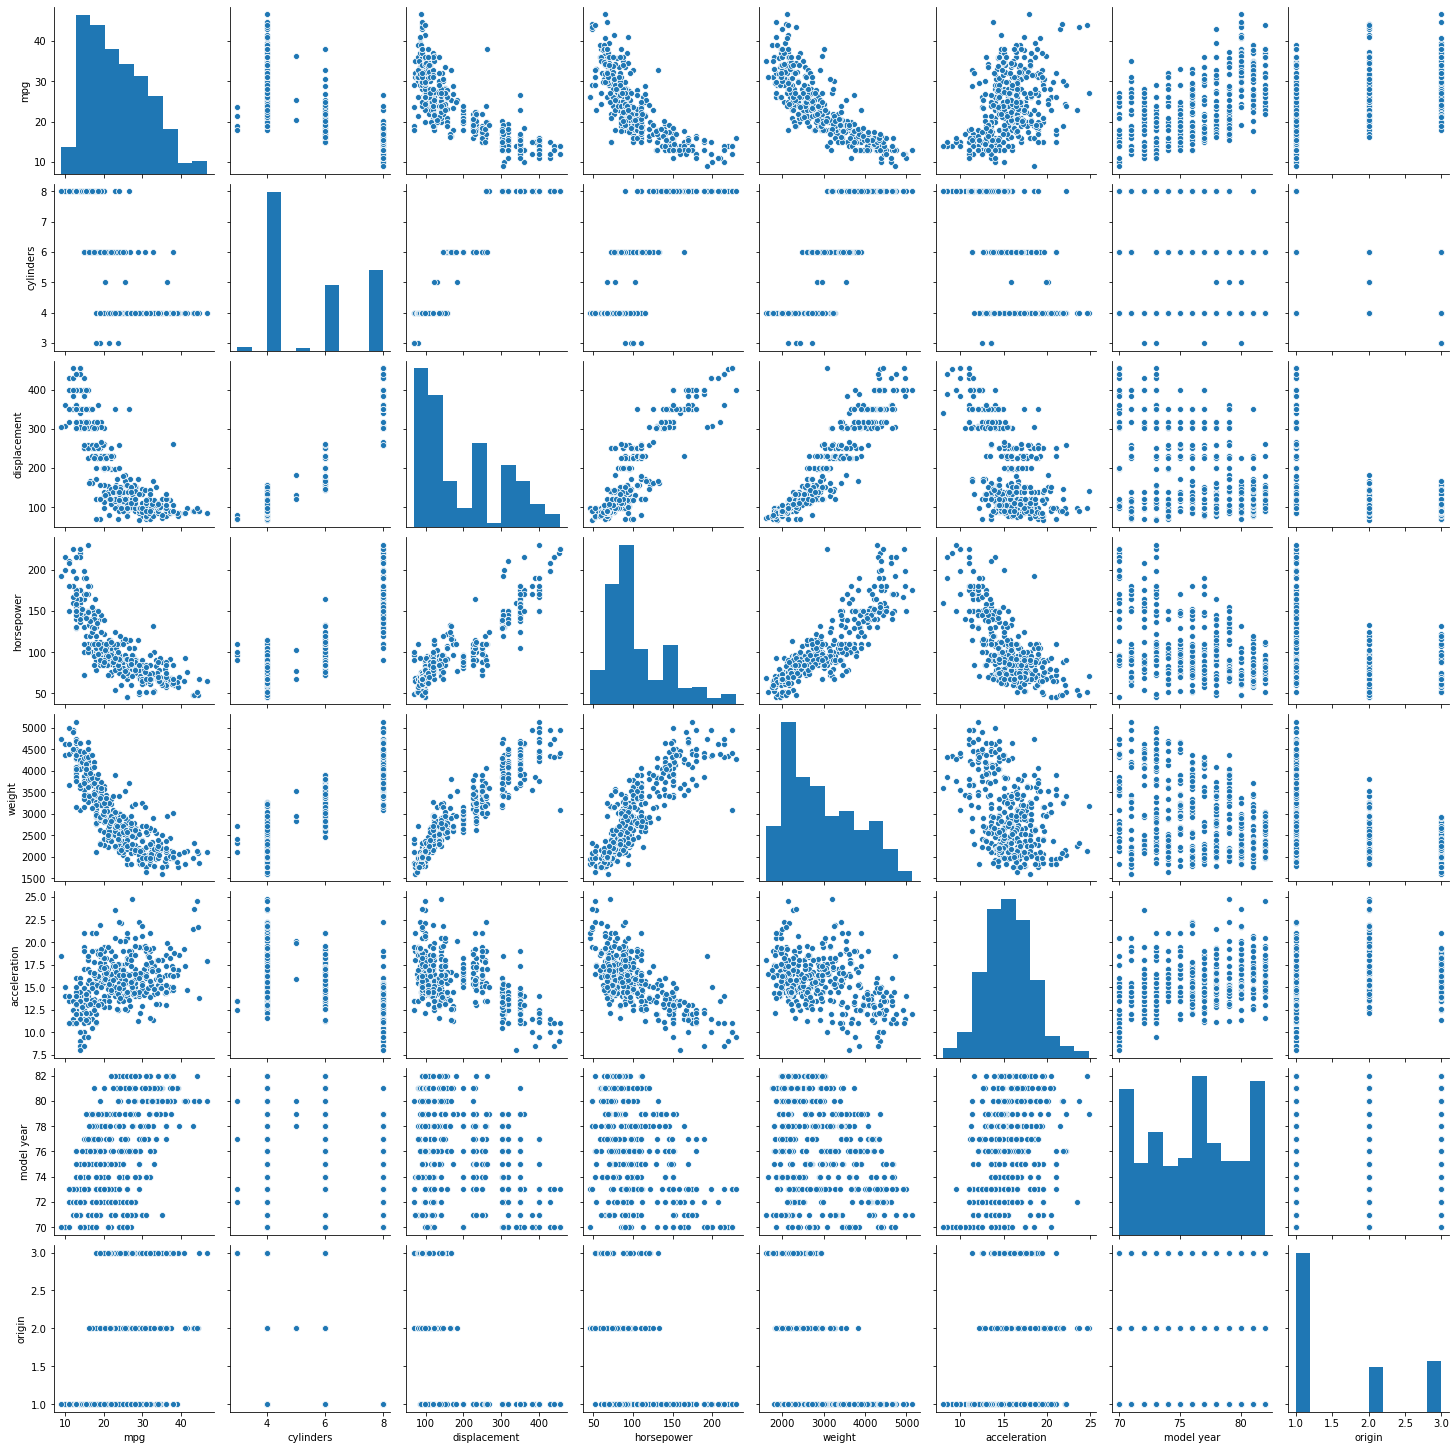

In [26]:
sns.pairplot(final_data)

## Linear Regression

In [27]:
X = final_data.drop("mpg", axis=1)
y = final_data["mpg"].copy()

In [28]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
print(len(X_train))
print(len(X_test))

266
132


In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.score(X_test, y_test)

0.8442527203494312

## With Polynomial Feature

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures()

X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)

In [38]:
len(X_train1[0])

36

In [39]:
reg = LinearRegression().fit(X_train1, y_train)

In [40]:
reg.score(X_test1, y_test)

0.8783575366583551

## Save the model

In [41]:
import joblib

In [42]:
filename = 'finalized_model.pkl'
joblib.dump(reg, filename)

['finalized_model.pkl']